In [1]:
import pandas as pd
import os
import numpy as np
import pickle

import matplotlib.pyplot as plt
from statistics import mean
import math
from math import log
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5


In [3]:
pkl_file = open('2019-12-14_18-05-55.pkl', 'rb')
mydata = pickle.load(pkl_file)


[-0.00854556  0.00391444 -0.01117556 ... -1.76469556 -1.75779556
 -1.72154556]


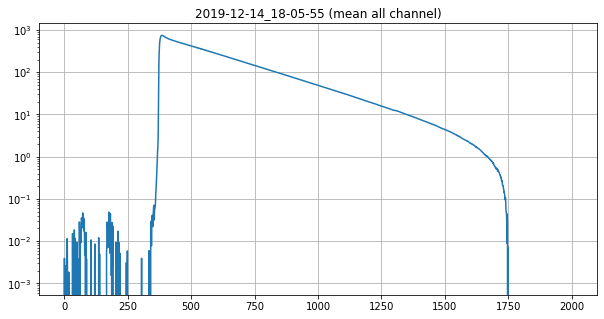

In [4]:
rcParams['figure.figsize'] = 10, 5

dict_s ={}
for key, value in mydata.items():
#    data1=np.where(mydata[key] < 16300, mydata[key], 0)
    data1=mydata[key]
    
    #print(key)
    dict_s.update({key:data1.mean(axis=0)})

data1=np.array(list(dict_s.values())).mean(axis=0)
np.savetxt("meanchannnel.csv", data1, delimiter=",")    
print(data1)
plt.plot(data1)
t = np.arange(len(data1))

plt.title('2019-12-14_18-05-55 (mean all channel)')
plt.yscale('log')
plt.grid(True)
#plt.ylim(0, 200)
#plt.xlim(368, 376)
#plt.legend()  # To draw legend
#plt.show()

In [5]:
def model(t, coeffs):
    #return (coeffs[0]*np.exp(-(t-coeffs[1])/coeffs[2]) + coeffs[3]*np.exp(-(t-coeffs[1])/coeffs[4]))
    #return (coeffs[0]+ coeffs[1]*np.exp(-(t-coeffs[2])/coeffs[3]) )
    return (coeffs[0]*np.exp(-t*coeffs[1]))

#x0 = np.array([365, 5,1 , 600, 10], dtype=float)
x0 = np.array([3675, 0.00433,], dtype=float)
print(x0)
def residuals(coeffs, y, t):
    return y - model(t, coeffs)


[3.675e+03 4.330e-03]


In [6]:
def func(x, a, b, c, d, e, f, g, z):
    #return a + b*np.exp(-x/c)
    return (z + a*np.exp(-(x-a)/b)+c*np.exp(-(x-a)/d)+e*np.exp(-(x-a)/f))
    #return (a*np.power(x-b/c)*(d*np.exp(-(x-b)/e)+f*np.exp(-(x-b)/g)))
    #return (a*np.exp(-(x-b)*c) + d/np.exp(-(x-e)*f))

In [7]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func,  data1, t, p0=(0.1 ,0.1 ,10000 ,100 ,0.1 ,100 ,1,10000 ))
popt
#[335.32882701, 822.15743957, 246.29549506]

/home/furkan/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([ 1.37877188e+00,  4.49425812e-01, -1.79170225e+06, -1.47595718e+06,
        5.56391585e+06,  1.10877548e+11,  1.00000000e+00, -3.77117485e+06])

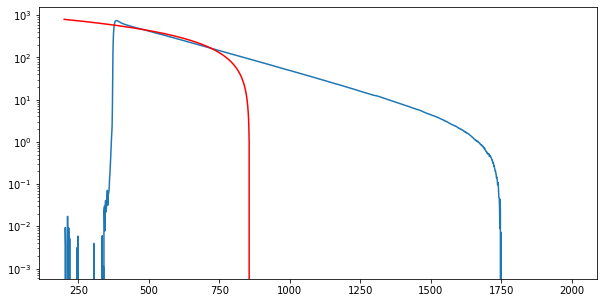

In [14]:
plt.plot(t[200:2000:1],data1[200:2000:1], t[200:2000:1], func(t[200:2000:1], *popt), 'r-', label='fit')
plt.yscale('log')

In [30]:
from scipy.optimize import leastsq
x, flag = leastsq(residuals, x0, args=(data1[500:1000:1], t[500:1000:1]))
print (x)

[3.58897577e+03 4.27460660e-03]


2000

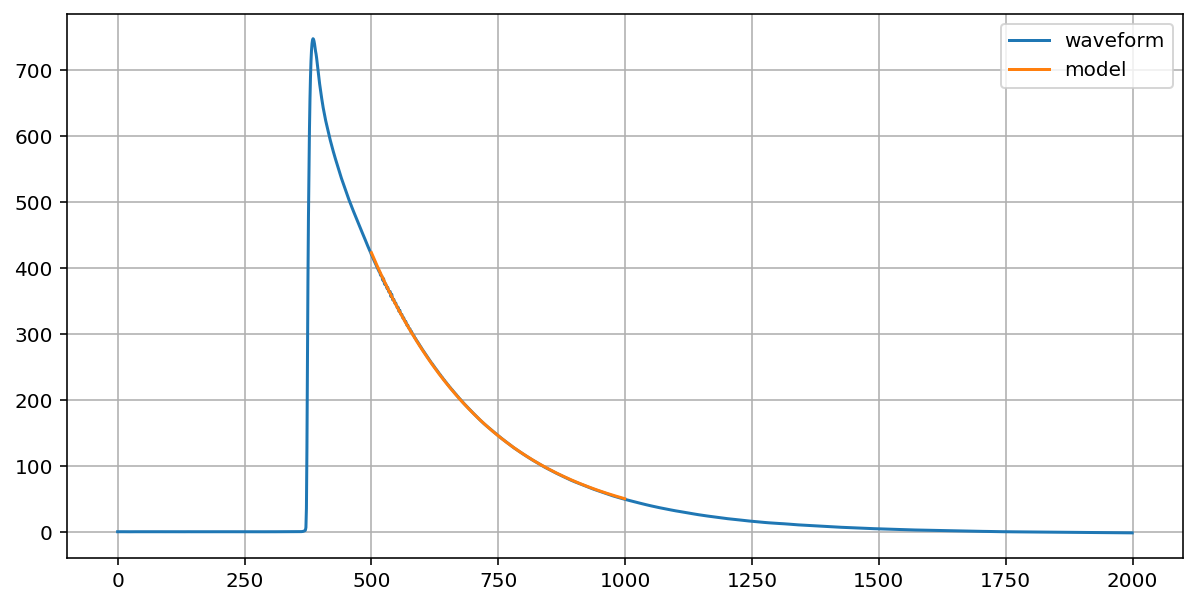

In [145]:
plt.plot(t,data1,t[500:1000:1], model(t[500:1000:1], x)) 
#print(model(t[500:1000:1], x0))
plt.legend(['waveform', 'model']) 
#plt.ylim(0,800)
#plt.xlim(400,1100)

#plt.yscale('log')

plt.grid(True)
plt.show()
t.size

/home/furkan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Amplitude estimate = 0.000236, tau estimate = 5937.564285


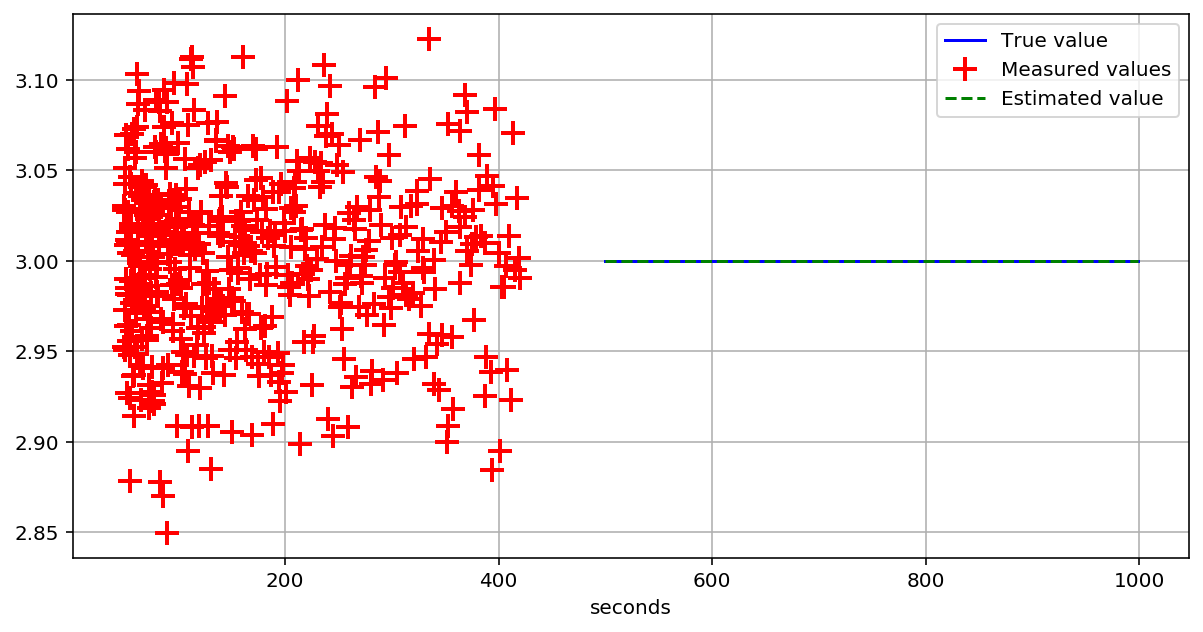

In [70]:
from pylab import *
from math import log
 
def fitExponent(tList,yList,ySS=0):
   '''
   This function finds a 
       tList in sec
       yList - measurements
       ySS - the steady state value of y
   returns
       amplitude of exponent
       tau - the time constant
   '''
   bList = [log(max(y-ySS,1e-6)) for y in yList]
   b = matrix(bList).T
   rows = [ [1,t] for t in tList]
   A = matrix(rows)
   #w = (pinv(A)*b)
   (w,residuals,rank,sing_vals) = lstsq(A,b)
   tau = -1.0/w[1,0]
   amplitude = exp(w[0,0])
   return (amplitude,tau)
 
if __name__=='__main__':
   import random
 
   t=np.arange(len(data1))
   tList =t[500:1000:1] 

   tSamples = data1[500:1000:1]
   random.seed(0.0)
   tau = 0.3
   amplitude = 3
   ySS = 3
   yList = amplitude*(exp(-tList/tau))+ySS
   ySamples = amplitude*(exp(-tSamples/tau))+ySS
   yMeasured = [y+random.normalvariate(0,0.05) for y in ySamples]
   #print yList
   (amplitudeEst,tauEst) = fitExponent(tSamples,yMeasured,ySS)
   print ('Amplitude estimate = %f, tau estimate = %f'
       % (amplitudeEst,tauEst))
        
   yEst = amplitudeEst*(exp(-tList/tauEst))+ySS
 
   figure(1)
   plot(tList,yList,'b')
   plot(tSamples,yMeasured,'+r',markersize=12,markeredgewidth=2)
   plot(tList,yEst,'--g')
   xlabel('seconds')
   legend(['True value','Measured values','Estimated value'])
   grid(True)
   show()